# Sentiment Analysis Using LSTM

This project leverages Long Short-Term Memory (LSTM) networks to perform sentiment analysis on textual data. By training the model on labeled datasets, it can accurately predict the sentiment of given text inputs. This project can be useful in various applications, including customer feedback analysis, social media monitoring, and opinion mining. It can be implemented in industries to automate sentiment-based decision-making processes, enhancing customer relations and product strategies.

**Author:** [Santosh Kumar Behera](https://www.linkedin.com/in/santosh-behera-9b1b2a19b/)  
**Date:** 18-Aug-2024  
**Versions:**  
- V1.0: First release  
- V1.1: Add Decision Tree  
- V1.1.1: Add SVM  
- V1.1.2: Add Random Forest Classifier  
- V1.2: Add Glove Embeddings  
- V1.3: Save models  

### Load Dataset

In [1]:
import pandas as pd

In [2]:
df_train = pd.read_csv('./data/train.txt', names = ['Text', 'Emotion'], sep = ';')
df_val = pd.read_csv('./data/val.txt', names = ['Text', 'Emotion'], sep = ';')
df_test = pd.read_csv('./data/test.txt', names = ['Text', 'Emotion'], sep = ';')

### Analyze Data

In [3]:
df_train.head(5)

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [4]:
print(df_train.shape)

(16000, 2)


In [5]:
df_test.head(5)

,Text,Emotion
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [6]:
print(df_test.shape)

(2000, 2)


In [7]:
df_val.head(5)

,Text,Emotion
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy


In [8]:
print(df_val.shape)

(2000, 2)


In [9]:
# Class counts
df_train.Emotion.value_counts()

Emotion
joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64

In [10]:
# Class ratio
(df_train.Emotion.value_counts() / df_train.shape[0]) * 100

Emotion
joy         33.51250
sadness     29.16250
anger       13.49375
fear        12.10625
love         8.15000
surprise     3.57500
Name: count, dtype: float64

### Plot Data

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(font_scale = 1.3)

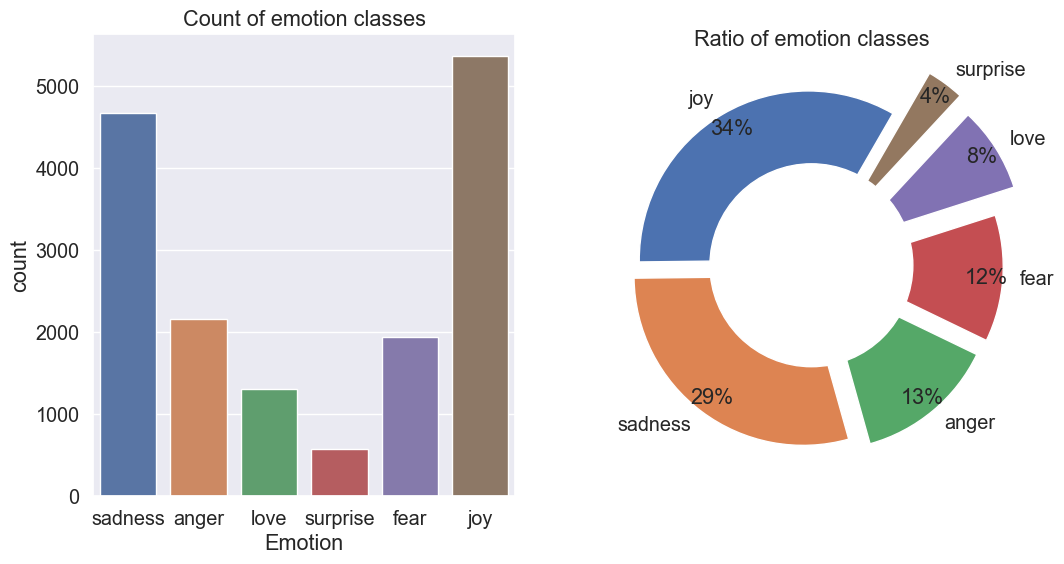

In [12]:
def plot_data(df, col = 'Emotion'):
    sizes = df[col].value_counts()
    labels = sizes.index
    
    fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 6))

    sns.countplot(x = col, data = df, ax = ax1)
    
    explode = list((np.array(list(df[col].dropna().value_counts())) / sum(list(df[col].dropna().value_counts())))[::-1])
    #ax.pie(sizes, explode = explode, colors = bo, startangle = 60, labels = labels, autopct = '%1.0f%%', pctdistance = 0.9)
    ax2.pie(sizes, explode = explode, startangle = 60, labels = labels, autopct = '%1.0f%%', pctdistance = 0.9)
    
    ax2.add_artist(plt.Circle((0, 0), 0.6, fc = 'white'))
    ax1.set_title("Count of emotion classes")
    ax2.set_title("Ratio of emotion classes")
    plt.show()

plot_data(df_train)

In [13]:
df_train.isnull().sum()

Text       0
Emotion    0
dtype: int64

In [14]:
# Print the number of duplicated values 
df_train['Text'].duplicated().sum()

31

In [15]:
# Print the rows which are duplicated (duplicated in the text but with different emotions)
df_train[df_train['Text'].duplicated() == True]

,Text,Emotion
5067,i feel on the verge of tears from weariness i ...,joy
6133,i still feel a craving for sweet food,love
6563,i tend to stop breathing when i m feeling stre...,anger
7623,i was intensely conscious of how much cash i h...,sadness
7685,im still not sure why reilly feels the need to...,surprise
8246,i am not amazing or great at photography but i...,love
9596,ive also made it with both sugar measurements ...,joy
9687,i had to choose the sleek and smoother feel of...,joy
9769,i often find myself feeling assaulted by a mul...,sadness
9786,i feel im being generous with that statement,joy


In [16]:
# Print some of those rows to check
df_train[df_train['Text'] == df_train.iloc[7623]['Text']]

,Text,Emotion
1625,i was intensely conscious of how much cash i h...,anger
7623,i was intensely conscious of how much cash i h...,sadness


In [17]:
df_train[df_train['Text'] == df_train.iloc[14313]['Text']]

,Text,Emotion
14313,i feel so privileged to share that love with f...,joy


In [18]:
# Remove duplicated text 
index = df_train[df_train['Text'].duplicated() == True].index
df_train.drop(index, axis = 0, inplace = True)
df_train.reset_index(inplace = True, drop = True)

In [19]:
df_train[df_train['Text'] == df_train.iloc[13879]['Text']]

,Text,Emotion
13879,i get a feeling that why did i pay for getting...,anger


### Remove stopwords

In [20]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asuto\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

In [22]:
# Count the number of stopwords in the data
temp = df_train.copy()
temp['stop_words'] = temp['Text'].apply(lambda x: len(set(x.split()) & set(stop_words)))
temp.stop_words.value_counts()

stop_words
5     1416
7     1405
6     1392
4     1341
8     1319
3     1263
9     1177
10    1048
2      922
11     889
12     752
13     644
14     493
1      450
15     376
16     265
17     238
18     164
19     113
20      90
0       79
21      60
22      33
23      19
24       7
25       6
26       6
28       1
29       1
Name: count, dtype: int64

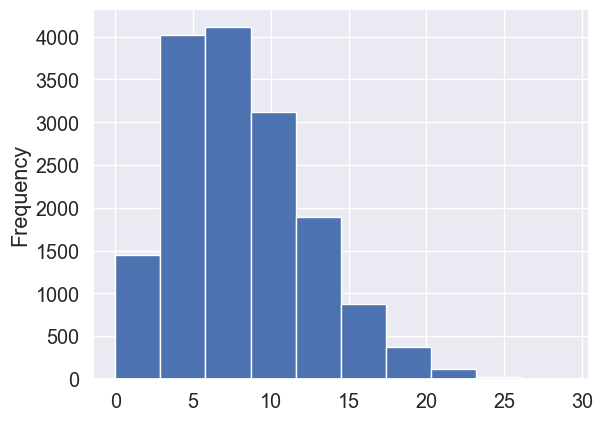

In [23]:
# Distribution of stopwords
temp['stop_words'].plot(kind = 'hist')
plt.show()

In [24]:
# Check if the data is balanced or not
df_test.Emotion.value_counts()

Emotion
joy         695
sadness     581
anger       275
fear        224
love        159
surprise     66
Name: count, dtype: int64

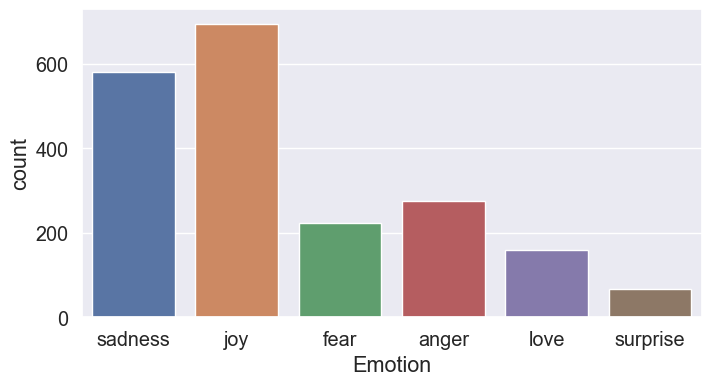

In [25]:
plt.figure(figsize = (8, 4))
sns.countplot(x = 'Emotion', data = df_test)
plt.show()

In [26]:
# Print the number of null values in each column
df_test.isnull().sum()

Text       0
Emotion    0
dtype: int64

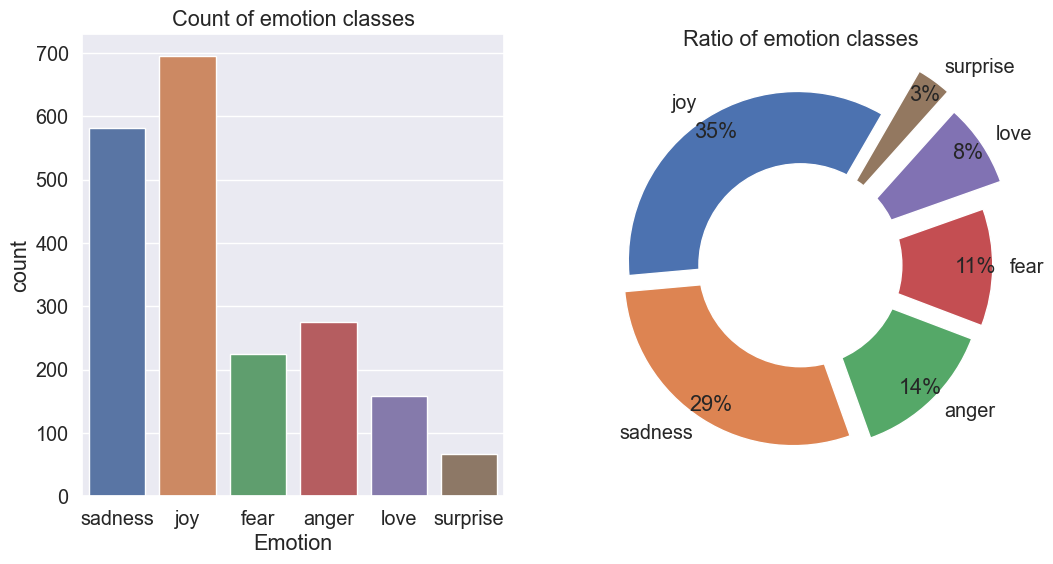

In [27]:
plot_data(df_test)

In [28]:
# Count the number of stopwords in the data
temp_test_df = df_test.copy()
temp_test_df['stop_words'] = temp_test_df['Text'].apply(lambda x: len(set(x.split()) & set(stop_words)))
temp_test_df.stop_words.value_counts()

stop_words
7     184
6     179
3     175
5     175
4     163
9     163
8     139
10    123
2     118
11    115
12     84
13     71
15     61
14     58
1      42
16     40
17     31
18     22
20     17
19     11
21     10
0       8
23      7
24      2
22      2
Name: count, dtype: int64

In [29]:
# Check if the data is balanced or not
df_val.Emotion.value_counts()

Emotion
joy         704
sadness     550
anger       275
fear        212
love        178
surprise     81
Name: count, dtype: int64

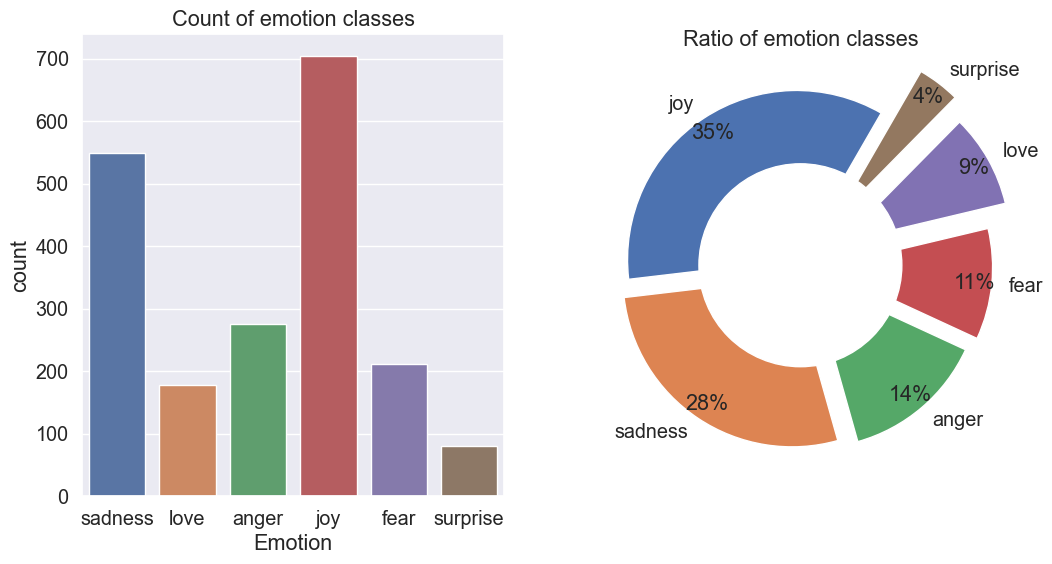

In [30]:
plot_data(df_val)

In [31]:
# Print the rows which are duplicated
df_val[df_val['Text'].duplicated() == True]

,Text,Emotion
603,i have had several new members tell me how com...,joy
1993,i feel so tortured by it,anger


In [32]:
# Remove duplicated text
index = df_val[df_val['Text'].duplicated() == True].index
df_val.drop(index, axis = 0, inplace = True)
df_val.reset_index(inplace = True, drop = True)

In [33]:
# Count the number of stopwords in the data
temp = df_val.copy()
temp['stop_words'] = temp['Text'].apply(lambda x: len(set(x.split()) & set(stop_words)))
temp.stop_words.value_counts()[:10]

stop_words
7     190
5     175
8     173
6     160
3     160
10    150
9     146
4     145
2     133
11    103
Name: count, dtype: int64

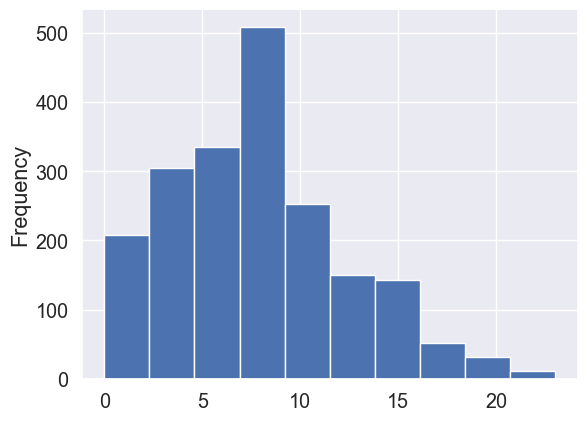

In [34]:
sns.set(font_scale = 1.3)
temp['stop_words'].plot(kind = 'hist')
plt.show()

### Process Text

In [35]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\asuto\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [36]:
from nltk.stem import WordNetLemmatizer
import re

In [37]:
lm = WordNetLemmatizer()

def text_transformation(df_col):
    corpus = []
    for item in df_col:
        new_item = re.sub('[^a-zA-Z]', ' ', str(item))
        new_item = new_item.lower()
        new_item = new_item.split()
        new_item = [lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(str(x) for x in new_item))
    return corpus

corpus = text_transformation(df_train['Text'])

In [38]:
from wordcloud import WordCloud

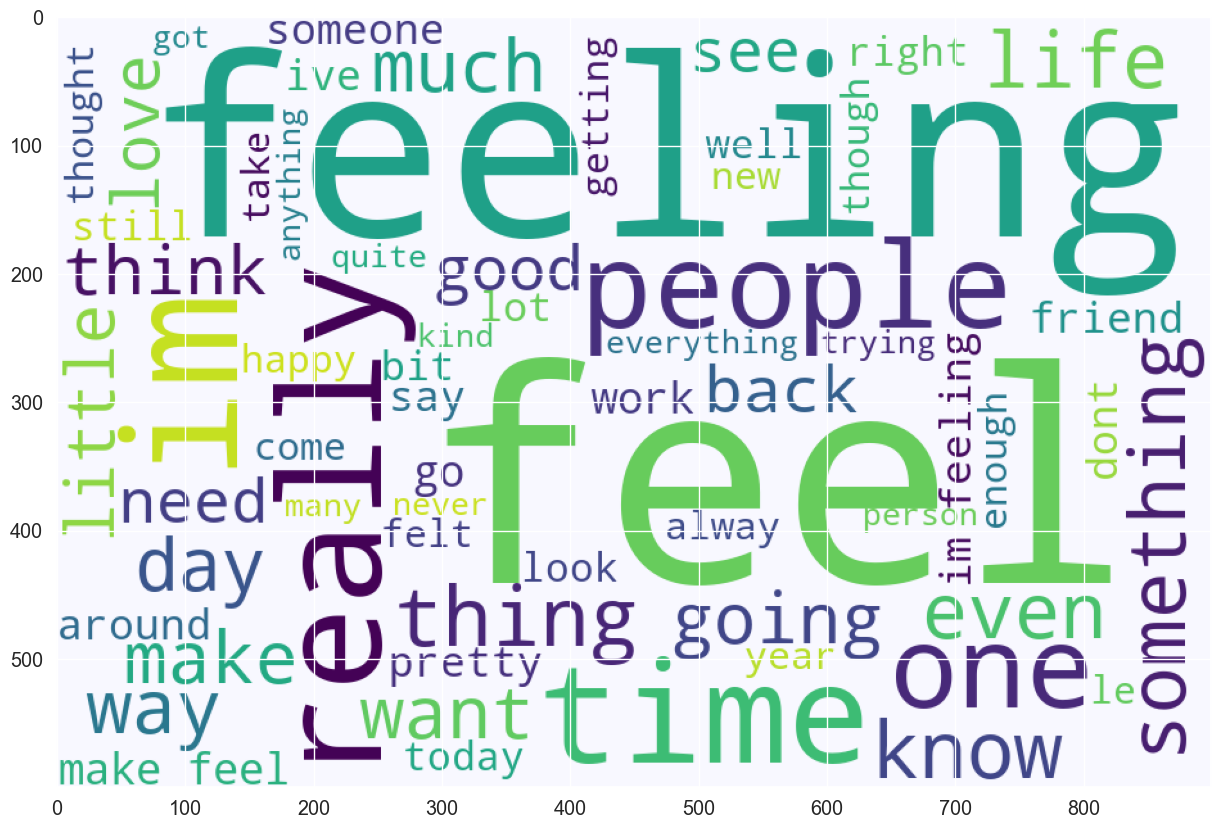

In [39]:
word_cloud = ""
for row in corpus:
    for word in row:
        word_cloud += " ".join(word)
wordcloud = WordCloud(width = 900, height = 600, background_color = 'ghostwhite', max_words = 200, min_font_size = 20).generate(word_cloud)

plt.figure(figsize = (16, 10))
plt.imshow(wordcloud)

In [40]:
def dataframe_difference(df1, df2, which = None):
    """Find rows which are different between two DataFrames."""
    
    # Combine the two DataFrames using a merge operation, with the
    # indicator parameter set to True. This adds a column called _merge
    # to the resulting DataFrame, which indicates the source of each row.
    comparison_df = df1.merge(df2, indicator = True, how = 'outer')
    
    # Filter the merged DataFrame based on the value of _merge. If which
    # is not specified, return all rows where _merge is not 'both'.
    # Otherwise, return all rows where _merge has the specified value
    if which is None:
        diff_df = comparison_df[comparison_df['_merge'] != 'both']
    else:
        diff_df = comparison_df[comparison_df['_merge'] == which]
        
    # Return the filtered DataFrame
    return diff_df

dataframe_difference(df_train, df_test, which = 'both')

,Text,Emotion,_merge


In [41]:
def lower_case(text):
    text = text.split()
    text = [y.lower() for y in text]
    return " ".join(text)

lower_case("My Name is santosh; Plays cricket 9 pm !!!")

'my name is santosh; plays cricket 9 pm !!!'

In [42]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

remove_urls("Are you sure; It's amazing!")

"Are you sure; It's amazing!"

In [43]:
def remove_punctuations(text):
    # Remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', text)
    text = text.replace('؛', "", )
    
    # remove extra whitespace
    text = re.sub('\s+', ' ', text)
    text =  " ".join(text.split())
    return text.strip()

remove_punctuations("My Name is santosh; Plays cricket 9 pm !!!")

'My Name is santosh Plays cricket 9 pm'

In [44]:
def remove_numbers(text):
    text = ''.join([i for i in text if not i.isdigit()])
    return text

remove_numbers("My Name is santosh. Plays cricket 9 pm")

'My Name is santosh. Plays cricket  pm'

In [45]:
def remove_stop_words(text):
    text = [i for i in str(text).split() if i not in stop_words]
    return " ".join(text)

remove_stop_words("My Name is santosh. Plays cricket")

'My Name santosh. Plays cricket'

In [46]:
def lemmatization(text):
    lemmatizer = WordNetLemmatizer()
    text = text.split()
    text = [lemmatizer.lemmatize(y) for y in text]
    return " ".join(text)

lemmatization("My Name is santosh. Plays cricket")

'My Name is santosh. Plays cricket'

In [47]:
def remove_small_sentences(df):
    for i in range(len(df)):
        if len(df.text.iloc[i].split()) < 3:
            df.text.iloc[i] = np.nan

In [48]:
def preprocess_sentence(sentence):
    sentence = lower_case(sentence)
    sentence = remove_urls(sentence)
    sentence = remove_punctuations(sentence)
    sentence = remove_numbers(sentence)
    sentence = remove_stop_words(sentence)
    sentence = lemmatization(sentence)
    return sentence

preprocess_sentence("My Name is santosh; Plays cricket 9 pm !!!")

'name santosh play cricket pm'

In [49]:
def normalize_text(df):
    df.Text = df.Text.apply(lambda text : preprocess_sentence(text))
    return df

In [50]:
df_train = normalize_text(df_train)
df_test = normalize_text(df_test)
df_val = normalize_text(df_val)

### Vectorizer

In [51]:
### TF-IDF

# The word counts suffer some issues: most frequent words are usually not important (like stop words),
# while they take high focus/count.TFIDF (Term Frequency - Inverse Document) is a way to adjust those counts.

# TF: mentions within a document & IDF: mentions across all docs

# So it gives higher importance to rare words across all docs (IDF++, TFIDF--), while it emphasises on words
# appearing mostly in THIS doc (TF++, TFIDF--). If a word appearing only in the current doc/sentence,
# it has TFIDF=1. If a word appears in all docs/sents but not the current one, it has TFIDF=0.
# If a word (stop word for example) appearing a lot in the current doc/sent and also in ALL others,
# it will have high TF (count) and much higher IDF (discount), so low TFIDF overall

In [52]:
# Preprocessing text for TF-IDF

X_train = df_train['Text'].values
y_train = df_train['Emotion'].values

X_test = df_test['Text'].values
y_test = df_test['Emotion'].values

X_val = df_val['Text'].values
y_val = df_val['Emotion'].values

### Train Models

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

In [54]:
def train_model(model, data, targets):
    """
    Parameters:
    model (sklearn model): The model to be trained.
    data (list of str): The input data.
    targets (list of str): The targets.
    
    Returns:
    Pipeline: The trained model as a Pipeline object.
    """
    
    # Create a Pipeline object with a TfidfVectorizer and the given model
    text_clf = Pipeline([('vect', TfidfVectorizer()), ('clf', model)])
    
    # Fit the model on the data and targets
    text_clf.fit(data, targets)
    
    return text_clf

In [55]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report

In [56]:
def get_F1_score(trained_model, x, y):
    """    
    Parameters:
    trained_model (sklearn model): The trained model.
    x (list of str): The input data.
    y (list of str): The targets.
    
    Returns:
    array: The F1 score for each class.
    """
    
    # Make predictions on the input data using the trained model
    predicted = trained_model.predict(x)
    
    # Calculate the F1 score for the predictions
    f1 = f1_score(y, predicted, average = None)
    
    # Return the F1 score
    return f1

### Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
#Train the model with the training data
log_reg = train_model(LogisticRegression(solver = 'liblinear', random_state = 0), X_train, y_train)

In [59]:
# Make a single prediction
y_pred = log_reg.predict(['Happy'])
y_pred

array(['joy'], dtype=object)

In [60]:
from sklearn.metrics import accuracy_score

In [61]:
# test the model with the test data
y_pred = log_reg.predict(X_test)

# calculate the accuracy
log_reg_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', log_reg_accuracy, '\n')

# calculate the F1 score
f1_Score = get_F1_score(log_reg, X_test, y_test)
pd.DataFrame(f1_Score, index = df_train.Emotion.unique(), columns = ['F1 score'])

Accuracy:  0.8685 



,F1 score
sadness,0.858223
anger,0.823810
love,0.893048
surprise,0.703704
fear,0.915683
joy,0.626263


In [62]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       anger       0.89      0.83      0.86       275
        fear       0.88      0.77      0.82       224
         joy       0.83      0.96      0.89       695
        love       0.86      0.60      0.70       159
     sadness       0.90      0.93      0.92       581
    surprise       0.94      0.47      0.63        66

    accuracy                           0.87      2000
   macro avg       0.88      0.76      0.80      2000
weighted avg       0.87      0.87      0.86      2000



### Decission Tree

In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
# Train the model with the training data
Decission_tree = train_model(DecisionTreeClassifier(random_state = 0), X_train, y_train)

# test the model with the test data
y_pred=Decission_tree.predict(X_test)

# calculate the accuracy
decission_tree_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', decission_tree_accuracy,'\n')

# calculate the F1 score
f1_Score = get_F1_score(Decission_tree, X_test, y_test)
pd.DataFrame(f1_Score, index = df_train.Emotion.unique(), columns = ['F1 score']) 

Accuracy:  0.859 



,F1 score
sadness,0.873440
anger,0.798206
love,0.890671
surprise,0.737805
fear,0.900605
joy,0.617647


In [65]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       anger       0.86      0.89      0.87       275
        fear       0.80      0.79      0.80       224
         joy       0.90      0.88      0.89       695
        love       0.72      0.76      0.74       159
     sadness       0.90      0.90      0.90       581
    surprise       0.60      0.64      0.62        66

    accuracy                           0.86      2000
   macro avg       0.80      0.81      0.80      2000
weighted avg       0.86      0.86      0.86      2000



### Support Vector Machine

In [66]:
from sklearn.svm import SVC

In [67]:
#Train the model with the training data
SVM = train_model(SVC(random_state = 0), X_train, y_train)

#test the model with the test data
y_pred = SVM.predict(X_test)

#calculate the accuracy
SVM_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', SVM_accuracy, '\n')

#calculate the F1 score
f1_Score = get_F1_score(SVM, X_test, y_test)
pd.DataFrame(f1_Score, index = df_train.Emotion.unique(), columns = ['F1 score']) 

Accuracy:  0.8675 



,F1 score
sadness,0.857685
anger,0.827907
love,0.893645
surprise,0.681648
fear,0.914821
joy,0.654206


In [68]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       anger       0.90      0.82      0.86       275
        fear       0.86      0.79      0.83       224
         joy       0.83      0.96      0.89       695
        love       0.84      0.57      0.68       159
     sadness       0.91      0.92      0.91       581
    surprise       0.85      0.53      0.65        66

    accuracy                           0.87      2000
   macro avg       0.87      0.77      0.80      2000
weighted avg       0.87      0.87      0.86      2000



### Random Forest Classifier

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
#Train the model with the training data
random_forest = train_model(RandomForestClassifier(random_state = 0), X_train, y_train)

#test the model with the test data
y_pred=random_forest.predict(X_test)

#calculate the accuracy
random_forest_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', random_forest_accuracy, '\n')

#calculate the F1 score
f1_Score = get_F1_score(random_forest, X_test, y_test)
pd.DataFrame(f1_Score, index = df_train.Emotion.unique(), columns = ['F1 score']) 

Accuracy:  0.8895 



,F1 score
sadness,0.903811
anger,0.868421
love,0.908199
surprise,0.738983
fear,0.933798
joy,0.634146


In [71]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       anger       0.90      0.91      0.90       275
        fear       0.85      0.88      0.87       224
         joy       0.89      0.93      0.91       695
        love       0.80      0.69      0.74       159
     sadness       0.95      0.92      0.93       581
    surprise       0.68      0.59      0.63        66

    accuracy                           0.89      2000
   macro avg       0.85      0.82      0.83      2000
weighted avg       0.89      0.89      0.89      2000



### Compare Models

In [72]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Random Forest'],
    'Accuracy': [log_reg_accuracy.round(2), decission_tree_accuracy.round(2), SVM_accuracy.round(2), random_forest_accuracy.round(2)]})

models.sort_values(by = 'Accuracy', ascending = False).reset_index().drop(['index'], axis = 1)

,Model,Accuracy
0,Random Forest,0.89
1,Logistic Regression,0.87
2,Support Vector Machine,0.87
3,Decision Tree,0.86


In [73]:
accuracies = {
    "SVM": SVM_accuracy,
    "Random Forest": random_forest_accuracy,
    "Decision Tree": decission_tree_accuracy,
    "Logistic Regression": log_reg_accuracy
}

In [74]:
# Sort accuracies in descending order
sorted_accuracies = sorted(accuracies.items(), key = lambda x: x[1], reverse = True)

# Extract model names and accuracies
model_names = [model[0] for model in sorted_accuracies]
accuracy_values = [model[1] for model in sorted_accuracies]

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


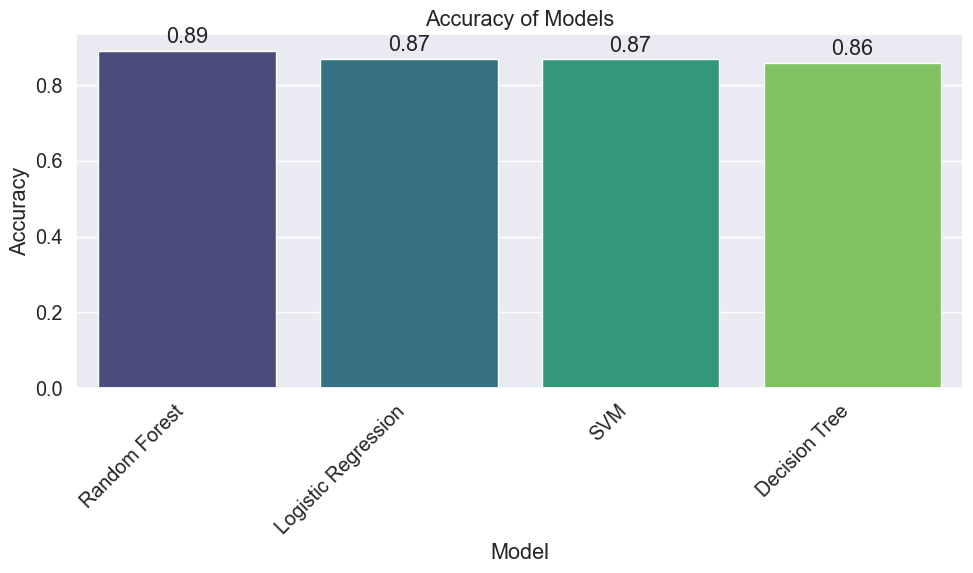

In [75]:
# Create countplot
plt.figure(figsize = (10, 6))
ax = sns.barplot(x = model_names, y = accuracy_values, palette = "viridis")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Accuracy of Models")
plt.xticks(rotation = 45, ha = 'right')

# Annotate each bar with its accuracy value
for i, v in enumerate(accuracy_values):
    ax.text(i, v + 0.01, f"{v:.2f}", ha = 'center', va = 'bottom')

plt.tight_layout()
plt.show()

In [76]:
# !pip install lime

In [77]:
# Lime libraries
from lime.lime_text import LimeTextExplainer

In [78]:
explainer_LR = LimeTextExplainer(class_names = random_forest.classes_)
idx = 22

print("Actual Text : ", X_test[idx])
print("Prediction : ", random_forest.predict(X_test)[idx])
print("Actual :     ", y_test[idx])

exp = explainer_LR.explain_instance(X_test[idx], random_forest.predict_proba, top_labels = 5)
exp.show_in_notebook()

Actual Text :  survey post last year feel pleased vague snippet feel little bit capture like someone like dublin st century
Prediction :  joy
Actual :      joy


In [79]:
# Splitting the text from the labels
X_train = df_train['Text']
y_train = df_train['Emotion']

X_test = df_test['Text']
y_test = df_test['Emotion']

X_val = df_val['Text']
y_val = df_val['Emotion']

y_val

0       sadness
1       sadness
2          love
3         anger
4           joy
         ...   
1993    sadness
1994        joy
1995        joy
1996        joy
1997        joy
Name: Emotion, Length: 1998, dtype: object

In [80]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [81]:
# Encode labels
le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
y_val = le.transform(y_val)

# Print the labels after encoding 
print(set(y_train))

{0, 1, 2, 3, 4, 5}


In [82]:
# Convert the class vector (integers) to binary class matrix
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

print(y_train)

[[0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]]


In [83]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [84]:
# Tokenize words
tokenizer = Tokenizer(oov_token = 'UNK')
tokenizer.fit_on_texts(pd.concat([X_train, X_test], axis = 0))

In [85]:
tokenizer.word_counts      ## A dictionary of words and their counts.

OrderedDict([('didnt', 304),
             ('feel', 12920),
             ('humiliated', 59),
             ('go', 492),
             ('feeling', 6139),
             ('hopeless', 68),
             ('damned', 4),
             ('hopeful', 67),
             ('around', 347),
             ('someone', 295),
             ('care', 132),
             ('awake', 21),
             ('im', 2736),
             ('grabbing', 6),
             ('minute', 71),
             ('post', 146),
             ('greedy', 75),
             ('wrong', 85),
             ('ever', 247),
             ('nostalgic', 55),
             ('fireplace', 3),
             ('know', 977),
             ('still', 660),
             ('property', 4),
             ('grouchy', 29),
             ('ive', 659),
             ('little', 831),
             ('burdened', 67),
             ('lately', 107),
             ('wasnt', 107),
             ('sure', 270),
             ('taking', 102),
             ('milligram', 1),
             ('time', 1090),


In [86]:
tokenizer.document_count   ## Total number of rows

17969

In [87]:
tokenizer.word_index['pathetic']

495

In [88]:
#converting a single sentence to list of indexes
tokenizer.texts_to_sequences(X_train[53].split())

[[7107], [11], [24], [940], [3], [359], [135], [31], [1016], [211], [7108]]

In [89]:
#convert the list of indexes into a matrix of ones and zeros (BOW)
tokenizer.texts_to_matrix(X_train[53].split()).shape

(11, 14325)

In [90]:
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)
sequences_val = tokenizer.texts_to_sequences(X_val)

sequences_train[0:10]

[[53, 2, 531],
 [31, 3, 421, 3445, 435, 45, 56, 176, 1223],
 [5, 2719, 393, 147, 2, 355, 302],
 [74, 3, 586, 4092, 8, 20, 3446],
 [3, 994],
 [21, 3, 11, 436, 226, 227, 65],
 [21, 247, 7092, 6, 7093, 755, 21, 2451, 1312, 54, 1669, 41, 2, 4, 352],
 [2, 338, 18, 1313, 693, 44, 170, 277],
 [5084, 44, 2, 5084, 5085, 51, 46, 914, 3015],
 [2, 568]]

In [91]:
## Padding 
# The vectors we obtained from the above are not in equal lengths
# So we need to add padding to its max length. 

In [92]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [93]:
maxlen = max([len(t) for t in df_train['Text']])
maxlen

229

In [94]:
X_train = pad_sequences(sequences_train, maxlen = 229, truncating = 'pre')
X_test = pad_sequences(sequences_test, maxlen = 229, truncating = 'pre')
X_val = pad_sequences(sequences_val, maxlen = 229, truncating = 'pre')

vocabSize = len(tokenizer.index_word) + 1
print(f"Vocabulary size = {vocabSize}")

Vocabulary size = 14325


### Word embedding using Glove

In [95]:
### Word embeddings
# path_to_glove_file: The file path to the GloVe word vectors file.

# num_tokens: The size of the vocabulary. This is typically the number of unique words in the dataset.

# embedding_dim: The dimensionality of the word vectors. This is usually set to a fixed value (e.g., 200, 300, etc.)
# depending on the size of the word vectors file that is being used.

# hits: A counter for the number of words that are found in the embeddings_index dictionary.

# misses: A counter for the number of words that are not found in the embeddings_index dictionary.

# embeddings_index: A dictionary that will store the word vectors, with the words as keys and 
# the word vectors as values.

In [96]:
# Reading GloVE embeddings

path_to_glove_file = './data/glove.6B.200d.txt'

num_tokens = vocabSize
embedding_dim = 200 #latent factors or features
hits = 0
misses = 0
embeddings_index = {}

In [97]:
# Read word vectors
with open(path_to_glove_file, encoding="utf8") as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


In [98]:
# Assign word vectors to our dictionary/vocabulary
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1

print("Converted %d words (%d misses)" % (hits, misses))

Converted 13243 words (1081 misses)


### LSTM

In [99]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, LSTM, Embedding, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [100]:
# Build neural network architecture

adam = Adam(learning_rate = 0.005)

model = Sequential()
model.add(Embedding(vocabSize, 200, input_length = X_train.shape[1], weights = [embedding_matrix], trainable = False))
model.add(Bidirectional(LSTM(256, dropout = 0.2, recurrent_dropout = 0.2, return_sequences = True)))
model.add(Bidirectional(LSTM(128, dropout = 0.2, recurrent_dropout = 0.2, return_sequences = True)))
model.add(Bidirectional(LSTM(128, dropout = 0.2, recurrent_dropout = 0.2, return_sequences = True)))
model.add(Bidirectional(LSTM(64, dropout = 0.2, recurrent_dropout = 0.2,  return_sequences = True)))
model.add(Bidirectional(LSTM(64, dropout = 0.2, recurrent_dropout = 0.2)))
model.add(Dense(6, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 229, 200)          2865000   
                                                                 
 bidirectional (Bidirection  (None, 229, 512)          935936    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 229, 256)          656384    
 onal)                                                           
                                                                 
 bidirectional_2 (Bidirecti  (None, 229, 256)          394240    
 onal)                                                           
                                                                 
 bidirectional_3 (Bidirecti  (None, 229, 128)          164352    
 onal)                                                  

In [101]:
# An Embedding layer that takes in integer-encoded text and looks up the embedding vector for each word in 
# the input. The input length is set to the length of the input sequences, and the weights are initialized with 
# an embedding matrix that has been pre-trained on a large dataset. The embedding layer is not trainable, 
# meaning that the weights of this layer will not be updated during training.

# Three Bidirectional layers, each of which applies a forward and backward LSTM to the input. 
# LSTMs are a type of recurrent neural network that are able to capture long-term dependencies in sequential data. 
# The dropout and recurrent dropout arguments specify the dropout rate to apply to the inputs and 
# recurrent inputs of the LSTMs, respectively. The return_sequences argument specifies whether the LSTM should 
# return the full sequences of outputs or just the last output of each sequence.

# A Dense layer that applies a linear transformation to the input to produce the output. The output has 6 units 
# and uses the 'softmax' activation function, which means that it will output a probability distribution over 
# the 6 classes.

In [102]:
# The first layer is an "Embedding" layer, which takes in integer-encoded text and looks up the embedding vector 
# for each word in the input. The output of this layer is a 3D tensor with shape 
# (batch_size, sequence_length, embedding_dim), where batch_size is the number of examples in the batch, 
# sequence_length is the length of the input sequences, and embedding_dim is the size of the embedding vectors. 
# In this case, the input sequences are 229 words long and the embedding vectors are 200 dimensions. 
# The embedding layer has a total of 2,863,600 trainable parameters.

# The next three layers are "Bidirectional" layers, which apply a forward and backward LSTM to the input. 
# LSTMs are a type of recurrent neural network that are able to capture long-term dependencies in sequential data. 
# The output of each bidirectional layer is a 3D tensor with shape (batch_size, sequence_length, units), 
# where units is the number of LSTM units in the layer. In this case, the first bidirectional layer has 512 units,
# the second has 256 units, and the third has 256 units. Each of these layers has a large number of trainable 
# parameters, as LSTMs are complex models with many internal weights.

# The final layer is a "Dense" layer, which applies a linear transformation to the input to produce the output. 
# In this case, the output has shape (batch_size, 6), indicating that there are 6 classes. 
# The dense layer has a total of 1,542 trainable parameters.

# Overall, the model has a total of 4,851,702 trainable parameters and 2,863,600 non-trainable parameters

In [103]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes = True, show_layer_names = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [104]:
# To stop the training when the loss starts to increase
callback = EarlyStopping(monitor = "val_loss", patience = 5, restore_best_weights = True)

In [105]:
# Fit model
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), verbose = 2, batch_size = 32, epochs = 30, callbacks = [callback])

Epoch 1/30
500/500 - 3655s - loss: 1.5402 - accuracy: 0.3697 - val_loss: 1.2114 - val_accuracy: 0.5606 - 3655s/epoch - 7s/step
Epoch 2/30
500/500 - 3642s - loss: 1.0918 - accuracy: 0.5957 - val_loss: 0.8284 - val_accuracy: 0.6977 - 3642s/epoch - 7s/step
Epoch 3/30
500/500 - 3456s - loss: 0.7254 - accuracy: 0.7241 - val_loss: 0.5636 - val_accuracy: 0.8203 - 3456s/epoch - 7s/step
Epoch 4/30
500/500 - 3434s - loss: 0.4536 - accuracy: 0.8500 - val_loss: 0.3010 - val_accuracy: 0.9019 - 3434s/epoch - 7s/step
Epoch 5/30
500/500 - 3426s - loss: 0.2858 - accuracy: 0.9024 - val_loss: 0.2346 - val_accuracy: 0.9174 - 3426s/epoch - 7s/step
Epoch 6/30
500/500 - 3434s - loss: 0.2169 - accuracy: 0.9206 - val_loss: 0.1803 - val_accuracy: 0.9324 - 3434s/epoch - 7s/step
Epoch 7/30
500/500 - 3434s - loss: 0.1798 - accuracy: 0.9306 - val_loss: 0.1743 - val_accuracy: 0.9234 - 3434s/epoch - 7s/step
Epoch 8/30
500/500 - 3428s - loss: 0.1658 - accuracy: 0.9327 - val_loss: 0.1593 - val_accuracy: 0.9294 - 3428s/

In [106]:
# Evaluate model on Validation data
model.evaluate(X_val, y_val, verbose = 1)

63/63 [==============================] - 263s 4s/step - loss: 0.1188 - accuracy: 0.9399


[0.11875045299530029, 0.9399399161338806]

In [107]:
# Evaluate model on Test data
model.evaluate(X_test, y_test, verbose = 1)

63/63 [==============================] - 271s 4s/step - loss: 0.1383 - accuracy: 0.9330


[0.13829603791236877, 0.9330000281333923]

In [108]:
predicted = model.predict(X_test)
y_pred = predicted.argmax(axis = -1)

63/63 [==============================] - 248s 4s/step


In [109]:
# Loss & Accuracy graph

%matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

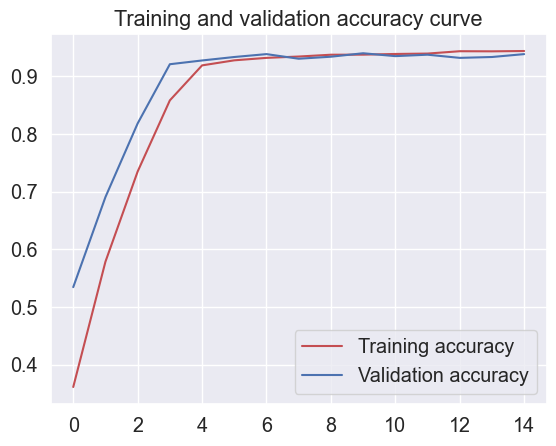

<Figure size 640x480 with 0 Axes>

In [110]:
plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy curve')
plt.legend()
plt.figure()
plt.show()

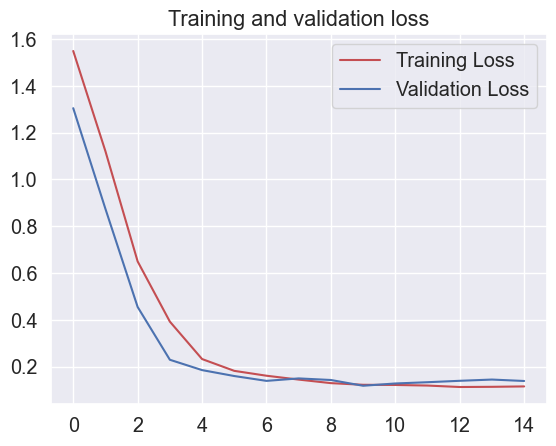

In [111]:
plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [112]:
## Now if user gives input to the model then how it will work? 

In [113]:
# First, the model will convert the words in the sentence into numerical representations, 
# also known as word embeddings. These word embeddings capture the meaning of the words and their relationships 
# to each other in a continuous vector space.

# The word embeddings for each word in the sentence are then input to two separate LSTM models: one that processes 
# the sequence forwards and one that processes it backwards. At each time step, each LSTM processes the current word 
# embedding and the previous hidden state to produce a new hidden state. The hidden state at each time step is a 
# combination of the previous hidden state and the current input, and it captures the information from all the 
# previous time steps in the sequence.

# After processing all the words in the sentence, the two LSTMs will have final hidden states that encode the 
# meaning of the sentence from both the forwards and backwards directions. These final hidden states are then 
# combined and used to make a prediction.

In [114]:
# Classify custom sample

sentences = [
            "He's over the moon about being accepted to the university",
            "Your point on this certain matter made me outrageous, how can you say so? This is insane.",
            "I can't do it, I'm not ready to lose anything, just leave me alone",
            "Merlin's beard harry, you can cast the Patronus charm! I'm amazed!"
            ]

for sentence in sentences:
    print(sentence)
    sentence = preprocess_sentence(sentence)
    sentence = tokenizer.texts_to_sequences([sentence])
    sentence = pad_sequences(sentence, maxlen = 229, truncating = 'pre')
    result = le.inverse_transform(np.argmax(model.predict(sentence), axis = -1))[0]
    proba =  np.max(model.predict(sentence))
    print(f"{result} : {proba}\n\n")

He's over the moon about being accepted to the university
1/1 [==============================] - 1s 1s/step
joy : 0.8355631828308105


Your point on this certain matter made me outrageous, how can you say so? This is insane.
1/1 [==============================] - 1s 1s/step
anger : 0.3789200782775879


I can't do it, I'm not ready to lose anything, just leave me alone
1/1 [==============================] - 1s 1s/step
fear : 0.4135104715824127


Merlin's beard harry, you can cast the Patronus charm! I'm amazed!
1/1 [==============================] - 1s 1s/step
surprise : 0.40110012888908386




In [115]:
### Labels ###
# 0: fear
# 1: sadnes
# 2: joy
# 3: anger
# 4: love
# 5: surprise

### Save the models

In [116]:
# !pip freeze > requirements.txt

In [117]:
model.save('./model/Sentiment_analysis_Eng-V3.h5')

C:\Users\asuto\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [118]:
import pickle

with open('./model/label_encoder.pkl', 'wb') as file:
    pickle.dump(le, file)

In [119]:
import json

# Save tokenizer to JSON
tokenizer_json = tokenizer.to_json()
with open('./model/tokenizer.json', 'w') as file:
    file.write(tokenizer_json)